# Greed and Fear Index

In [21]:
import requests

url = 'https://api.alternative.me/fng/'
params = {'limit':100000,'date_format':'world'}
response = requests.get(url,params).json()

In [22]:
import pandas as pd

In [23]:
fg= pd.DataFrame(response['data'])

In [29]:
fg['timestamp'] = pd.to_datetime(fg['timestamp'],dayfirst=True)

- Start date: 01-02-2018
- Total obs: 1760

# Cryptocurrencies exchange rates

## Cryptocurrencies (before 2018)

- Bitcoin (BTC) -2011
- Ethereum (ETH) - 2016
- Tether (USDT)- 2014
- Binance coin (BNB)- 2017
- Cardano (ADA) -2017
- Ripple (XRP) - 2012
- Dogecoin (DOGE) -2013
- Monero (XMR) - 2014
- Litecoin and Namecoin -2011

Total:9 

❌ This library interacts with the [CoinBase Pro API](https://pypi.org/project/Historic-Crypto/)

In [5]:
! pip install Historic-Crypto

In [6]:
from Historic_Crypto import HistoricalData

In [7]:
new = HistoricalData('ETH-USD',86400,'2022-06-01-00-00','2022-06-01-00-03',verbose = False).retrieve_data()

In [8]:
new

,low,high,open,close,volume
time,,,,,
2022-06-01,1761.59,1972.5,1940.49,1816.05,266690.7085


## ✅ API Source: [CoinAPI](https://docs.coinapi.io/?python#http-requests)

### Exchange rates

In [33]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=2018-02-01T00:00:00&time_end=2022-12-02T00:00:00&limit=100000'
headers = {'X-CoinAPI-Key' : 'CC32A4FC-471F-4200-8788-6C980B2C8CAF'} #API-key
response = requests.get(url, headers=headers).json()

In [34]:
BTC_EUR=pd.DataFrame(response)
BTC_EUR.tail()

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
1761,2022-11-28T00:00:00.0000000Z,2022-11-29T00:00:00.0000000Z,2022-11-28T00:00:00.0000000Z,2022-11-28T23:59:00.0000000Z,16419.925442,16474.841294,16007.520204,16207.746917
1762,2022-11-29T00:00:00.0000000Z,2022-11-30T00:00:00.0000000Z,2022-11-29T00:00:00.0000000Z,2022-11-29T23:59:00.0000000Z,16205.427231,16521.464380,16096.212200,16431.933788
1763,2022-11-30T00:00:00.0000000Z,2022-12-01T00:00:00.0000000Z,2022-11-30T00:00:00.0000000Z,2022-11-30T23:59:00.0000000Z,16436.943695,17224.683401,16429.145041,17166.772761
1764,2022-12-01T00:00:00.0000000Z,2022-12-02T00:00:00.0000000Z,2022-12-01T00:00:00.0000000Z,2022-12-01T23:59:00.0000000Z,17167.088476,17222.674214,16873.231948,16967.867303
1765,2022-12-02T00:00:00.0000000Z,2022-12-03T00:00:00.0000000Z,2022-12-02T00:00:00.0000000Z,2022-12-02T00:00:00.0000000Z,16978.618788,16978.618788,16978.618788,16978.618788


In [8]:
BTC_EUR.rename(columns={'time_close':'timestamp'},inplace=True)

In [14]:
BTC_EUR['timestamp'] = BTC_EUR['timestamp'].apply(lambda x: x[0:10])

In [15]:
import datetime

In [27]:
BTC_EUR['timestamp']=pd.to_datetime(BTC_EUR['timestamp'],yearfirst=True)
BTC_EUR=BTC_EUR[['timestamp','rate_close']]

In [31]:
df=fg.merge(BTC_EUR,how='left',on='timestamp')
df

,value,value_classification,timestamp,time_until_update,rate_close
0,26,Fear,2022-12-05,-1670176698,NaN
1,26,Fear,2022-12-04,NaN,NaN
2,27,Fear,2022-12-03,NaN,NaN
3,27,Fear,2022-12-02,NaN,16978.618788
4,27,Fear,2022-12-01,NaN,16967.867303
...,...,...,...,...,...
1761,11,Extreme Fear,2018-02-05,NaN,6893.694242
1762,24,Extreme Fear,2018-02-04,NaN,8158.506315
1763,40,Fear,2018-02-03,NaN,9203.247009
1764,15,Extreme Fear,2018-02-02,NaN,8797.092612


❌ [alphavantage](https://www.alphavantage.co/documentation/#currency-daily)- Weird format

In [11]:
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=VJECCG7TZAYBOPJ1'
r = requests.get(url)
data = r.json()
data=pd.DataFrame((data))
print(data)

                                                              Meta Data  \
1. Information            Daily Prices and Volumes for Digital Currency   
2. Digital Currency Code                                            BTC   
3. Digital Currency Name                                        Bitcoin   
4. Market Code                                                      EUR   
5. Market Name                                                     Euro   
...                                                                 ...   
2020-03-11                                                          NaN   
2020-03-10                                                          NaN   
2020-03-09                                                          NaN   
2020-03-08                                                          NaN   
2020-03-07                                                          NaN   

                                       Time Series (Digital Currency Daily)  
1. Information       

### Exchange rates base asset identifier (market)

Documentation [here](https://docs.coinapi.io/#list-all-assets-get)

In [8]:
import requests
url = 'https://rest.coinapi.io/v1/assets'
headers = {'X-CoinAPI-Key' : 'CC32A4FC-471F-4200-8788-6C980B2C8CAF'} #API-key
response = requests.get(url, headers=headers).json()

In [9]:
response
market=[i['asset_id'] for i in response]

In [10]:
market #Example

['USD',
 'BTC',
 'PLN',
 'EUR',
 'CNY',
 'JPY',
 'AUD',
 'CHF',
 'SEK',
 'GBP',
 'DKK',
 'RUB',
 'SGD',
 'CAD',
 'NZD',
 'THB',
 'NIS',
 'LTC',
 'KRW',
 'VEN',
 'XRP',
 'NMC',
 'USDT',
 'DOGE',
 'BLC',
 'SLL',
 'NVC',
 'FTC',
 'PPC',
 'TRC',
 'SVC',
 'ORO',
 'TOR',
 'VEF',
 'KST',
 'BTS',
 'NXT',
 'BURST',
 'PKR',
 'SBC',
 'BITCNY',
 'DRK',
 'DARK',
 'U',
 'BRL',
 'CLP',
 'ARI',
 'MUE',
 'SONG',
 'CON',
 'NAV',
 'MCC',
 'RICE',
 'GEO',
 'BITSD',
 'QTL',
 'TOP',
 'RED',
 'ETCO',
 'NTC',
 'AMBER',
 'MTLMC',
 'GUN',
 'TIT',
 'MCL',
 'CRAVE',
 'FONZ',
 'SQL',
 'DUCK',
 'UNIC',
 'OZC',
 'LUX',
 'BOB',
 'AIB',
 'ACP',
 'BTX',
 'DRZ',
 'BSTY',
 'LOG',
 'DEM',
 'CRW',
 'SKC',
 'FLN',
 'ORB',
 'LTS',
 'MARS',
 'UNO',
 'SPN',
 'PND',
 'XVG',
 'DGB',
 'FUNK',
 'XMG',
 'CCB',
 'SAK',
 'XPD',
 'AC',
 '8BIT',
 'XFC',
 'ANI',
 'TES',
 'PLC',
 'SHA',
 'DUO',
 '$PAC',
 'MOTO',
 'UNC',
 'FJC',
 'SJW',
 'LEA',
 'SOON',
 'ADC',
 'BNX',
 'V',
 'POLY',
 'HYP',
 'TTC',
 'PIGGY',
 'ICB',
 'VGC',
 'ELC',
 'CTO

In [15]:
len(market)

16378

In [17]:
type(BTC_EUR)

pandas.core.frame.DataFrame

/Users/monic/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value_classification', ylabel='rate_close'>

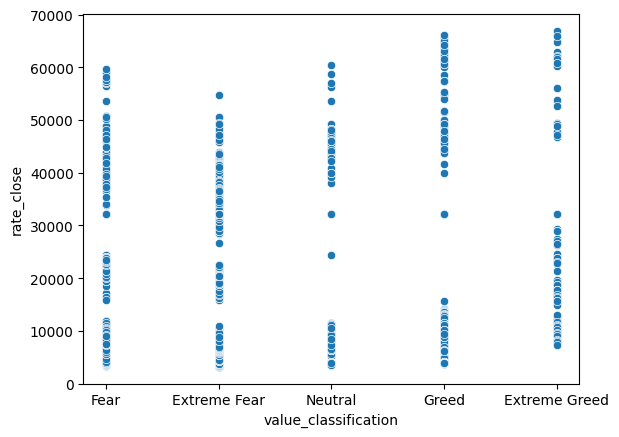

In [36]:
import seaborn as sns
sns.scatterplot(df['value_classification'],df['rate_close'])

### Optional: Add graphs with the current quotes for the exchanges with the selected cryptocurrency : idea [here](https://lewagon-alumni.slack.com/archives/D048CNCG5C2/p1669393053148439)

In [39]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC?invert=false'
headers = {'X-CoinAPI-Key' : 'CC32A4FC-471F-4200-8788-6C980B2C8CAF'} #API-key
response = requests.get(url, headers=headers).json()

In [40]:
response['rates']

{'asset_id_base': 'BTC',
 'rates': [{'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '$ADS',
   'rate': 113139.44559967723},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '$CINU',
   'rate': 3.454750301659396e+19},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '$ORE',
   'rate': 1604953.077671431},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '$PAC',
   'rate': 56394242.13428236},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '0X',
   'rate': 94076.78108107079},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '0XBTC',
   'rate': 129572.93764031367},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '1000SHIB',
   'rate': 3639907.645076189},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '10SET',
   'rate': 13853.882046717306},
  {'time': '2022-12-06T07:23:19.0000000Z',
   'asset_id_quote': '18C',
   'rate': 22714202.80324151},
  {'time': '2022-12-06T07:23

In [56]:
exchange_rate=pd.DataFrame(response['rates'])